## Name : Rohan Singh Rajput and Rohan Vardhan
### Assignment: House Price Prediction 
Description : This is a Kaggle Competition for the House Price Prediction. This is not a priced competition. We are using to enhance our data visualization skills. 

### DEVELOPMENT TRAIL
 ---------------------------------------------------------------------------------
 Date		Person						Notes<br>
 2017-05-10 Rohan Rajput			  	Initial Creation of Notebook for the Data Analytics<br>
 2017-06-05 Rohan Vardhan               
 

**1. Load Data**

First lets import all the libraries that will be used to load train and test datasets and data manipulation.

In [1]:
# Import libraries

# Pandas 
import pandas as pd
from pandas import Series,DataFrame 
pd.set_option('expand_frame_repr', True)

# Numpy and Matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning 
from sklearn import preprocessing

Loading train and test data

In [2]:
# Get Data in Dataframe 
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

Preview of train and test data

In [3]:
# head() shows the first 5 rows of the data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


There are 1460 entries in the train data set and 1459 entries in test data set. The data contains some NaN values too.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

**2. Data Manipulation and Visualization**

Lets check for NaN (null) values in the data

In [7]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

Lets check for the mean, standard deviation for Sales price

In [24]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Sales price is right skewed. So, we perform log transformation so that the skewness is nearly zero.

Skew is: 1.88287575977


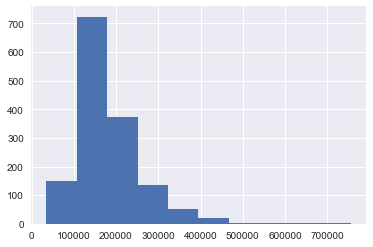

Skew is: 0.121346619897


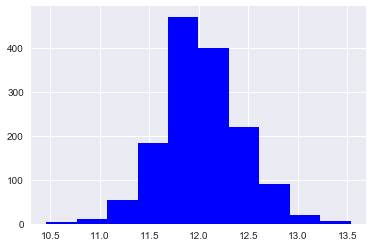

In [17]:
# Determining the Skewness of data 
print ("Skew is:", train.SalePrice.skew())

plt.hist(train.SalePrice)
plt.show()

# After log transformation of the data it looks much more center aligned
train['Skewed_SP'] = np.log(train['SalePrice']+1)
print ("Skew is:", train['Skewed_SP'].skew())
plt.hist(train['Skewed_SP'], color='blue')
plt.show()

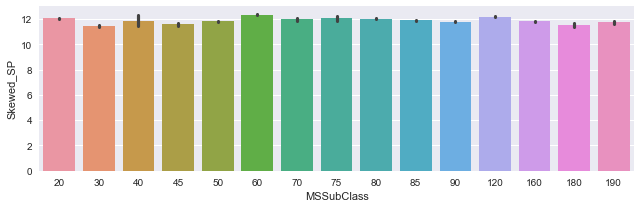

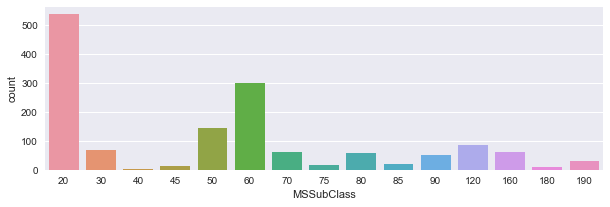

In [18]:
sns.factorplot('MSSubClass', 'Skewed_SP', data=train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSSubClass', data=train)

MSSubClass = 60 has highest SalePrice while the sales of houses with MSSubClass = 20 is the highest. 

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

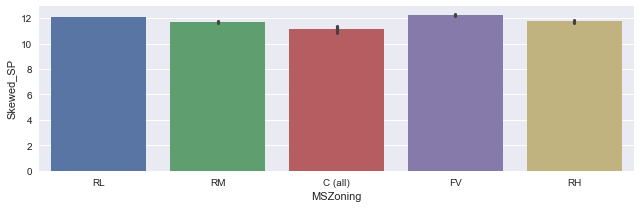

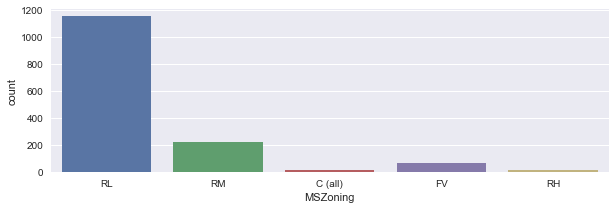

In [14]:
sns.factorplot('MSZoning', 'Skewed_SP', data=train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSZoning', data=train, ax=axis1)
train['MSZoning'].value_counts()

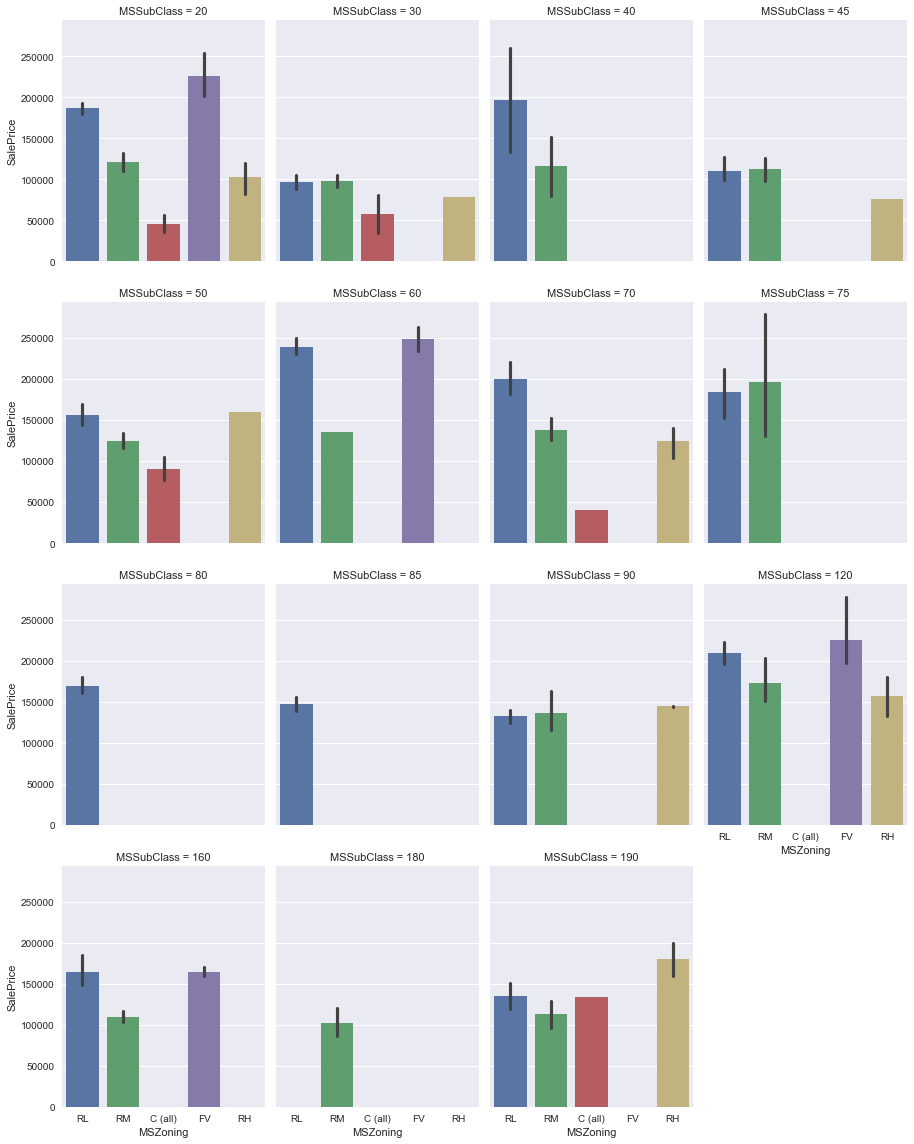

In [23]:
sns.factorplot(x='MSZoning', y='SalePrice', col='MSSubClass', data=train, kind='bar', col_wrap=4, aspect=0.8)

In [66]:
# It is important to find out the numeric feature of the data so we will analyse it by using numpy library
numerical_features = train.select_dtypes(include=[np.number])
numerical_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [67]:
# Then we will try to find the corretation between the feature and target
corr = numerical_features.corr()
#print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
#print (corr['SalePrice'].sort_values(ascending=False)[-5:])
print (corr['SalePrice'].sort_values(ascending=False)[:], '\n')


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [68]:
#This gives us most correlated five features from the data 
#We will analyse them further to get some more intution
train.OverallQual.unique()


array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [69]:
#Creating a pivot table 
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)

In [70]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


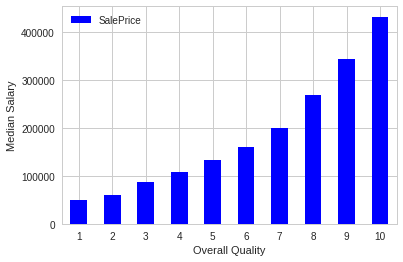

In [71]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

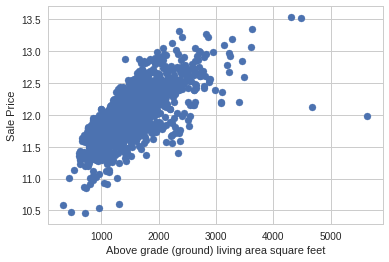

In [72]:
# Get some more intution using Scatter plot with Groundliving area and sales price
plt.scatter(x=train['GrLivArea'], y =target )
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

In [73]:
#Removing outliers
train = train[train['GrLivArea'] < 4000]

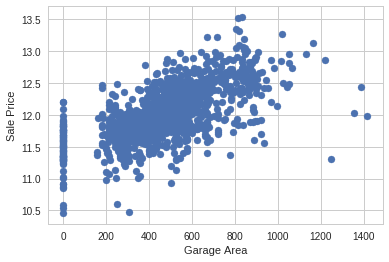

In [74]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [75]:
#Removing outliers
train = train[train['GarageArea'] < 1200]

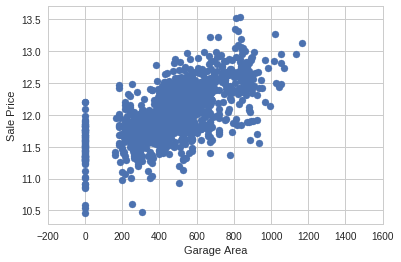

In [76]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [77]:
#Removing the null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [78]:
# Pool null value refers to no pool area
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [79]:
#Analysing the non numeric data 
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [80]:
#Data Trasformation 
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [81]:
# Turn into one hot encoding 
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

/home/rohan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
# Encoded 
print ('Encoded: \n') 
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


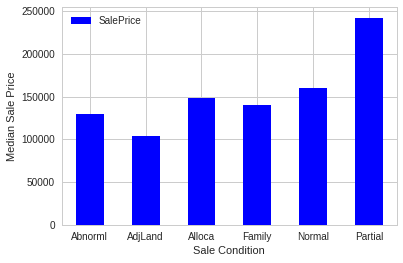

In [83]:
# Feature Engineering
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [84]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

/home/rohan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


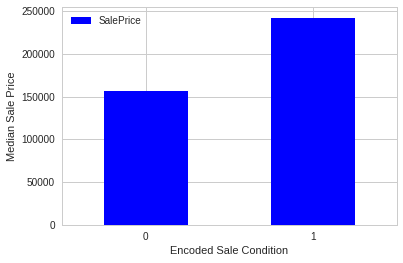

In [85]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [86]:
#Interpolation of data 
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
data 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,enc_street,enc_condition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,208500,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,181500,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,223500,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,140000,1,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,250000,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,320,0,0,700,10,2009,143000,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,0,0,8,2007,307000,1,0
7,8,60,63.0,10382,7,6,1973,1973,240.0,859,...,228,0,0,0,350,11,2009,200000,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,205,0,0,0,0,4,2008,129900,1,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,0,0,1,2008,118000,1,0


In [87]:
sum(data.isnull().sum() != 0)

0

In [88]:
# Linear Model for the  train and test
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [89]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,1,0
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,30,0,320,0,0,700,10,2009,1,0
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,57,0,0,0,0,0,8,2007,1,0
7,60,63.0,10382,7,6,1973,1973,240.0,859,32,...,204,228,0,0,0,350,11,2009,1,0
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,0,205,0,0,0,0,4,2008,1,0
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,4,0,0,0,0,0,1,2008,1,0


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [91]:
from sklearn import linear_model
from sklearn import ensemble

#lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
#lr = linear_model.LinearRegression()
lr = ensemble.GradientBoostingRegressor()
#lr = linear_model.TheilSenRegressor()
#lr = linear_model.RANSACRegressor(random_state=50)

In [92]:
model = lr.fit(X_train, y_train)

In [93]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.900774344643


In [94]:
predictions = model.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.0158418652462


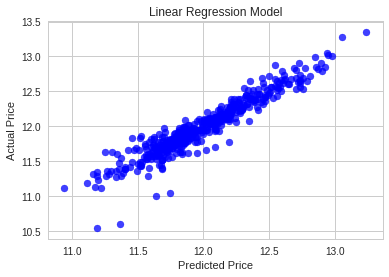

In [96]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

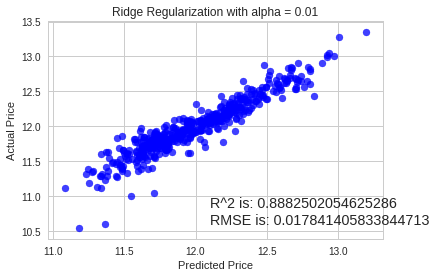

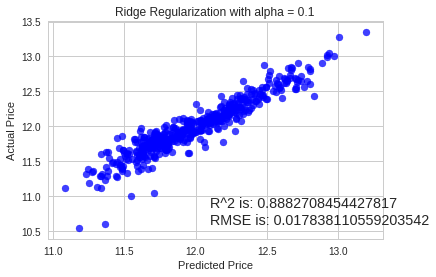

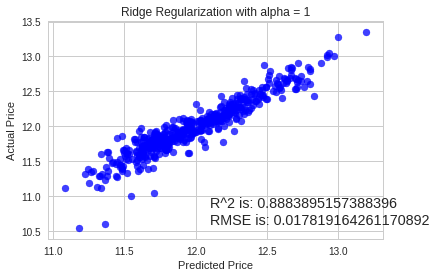

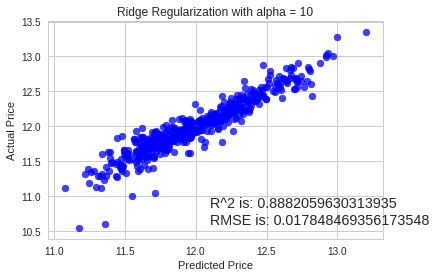

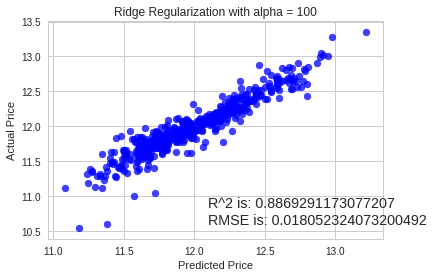

In [97]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [98]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [99]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()


In [100]:
predictions = model.predict(feats)


In [101]:
feats

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,120,0,0,6,2010,1.0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,36,0,0,0,0,12500,6,2010,1.0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,34,0,0,0,0,0,3,2010,1.0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,36,0,0,0,0,0,6,2010,1.0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,82,0,0,144,0,0,1,2010,1.0,0
5,60,75.0,10000,6,5,1993,1994,0.0,0.0,0.0,...,84,0,0,0,0,0,4,2010,1.0,0
6,20,69.0,7980,6,7,1992,2007,0.0,935.0,0.0,...,21,0,0,0,0,500,3,2010,1.0,0
7,60,63.0,8402,6,5,1998,1998,0.0,0.0,0.0,...,75,0,0,0,0,0,5,2010,1.0,0
8,20,85.0,10176,7,5,1990,1990,0.0,637.0,0.0,...,0,0,0,0,0,0,2,2010,1.0,0
9,20,70.0,8400,4,5,1970,1970,0.0,804.0,78.0,...,0,0,0,0,0,0,4,2010,1.0,0


In [102]:
final_predictions = np.exp(predictions)

In [103]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [ 11.7920179   12.01287438  12.14846373  12.12085925  12.16289151] 

Final predictions are: 
 [ 132192.95290092  164863.70399624  188803.8138639   183663.25961848
  191547.57943718]


In [104]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,132192.952901
1,1462,164863.703996
2,1463,188803.813864
3,1464,183663.259618
4,1465,191547.579437


In [105]:
submission.to_csv('submission1.csv', index=False)